**IMPORTS**

In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**OPEN DATA**

In [76]:
def loadImage(path, colormap):
    img = cv2.imread(path)
    if colormap == "gray":
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif colormap == "color":
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        print("invalid colormap")

In [77]:
imgColor = loadImage("AllImages/Desquamation3.jpg", "color")
imgColorDraw = loadImage("AllImages/Desquamation3.jpg", "color")
imgGray = loadImage("AllImages/Desquamation3.jpg", "gray")

**BINARISATION**

In [78]:
def binarisation(i, type, inv):
    if type == "otsu" and inv == "norm":
        return cv2.threshold(i, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    if type == "otsu" and inv == "inv":
        return cv2.threshold(i, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    if type == "tri" and inv == "norm":
        return cv2.threshold(i, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
    if type == "tri" and inv == "inv":
        return cv2.threshold(i, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_TRIANGLE)
    
    else:
        print("Invalid parameters")

In [79]:
retOtsu, threshOtsu = binarisation(imgGray, "otsu", "norm")
retTriangle, threshTriangle = binarisation(imgGray, "tri", "norm" )
retTriangle, threshTriangleInv = binarisation(imgGray, "tri", "inv" )
print(retOtsu)
print(retTriangle)

159.0
176.0


**DRAW AND FILL CONTOURS**

In [80]:
def contoursFill(ibn, i, clrCnt, clrfill):
    contours, hierarchy = cv2.findContours(ibn, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # contours = max(contours, key = cv2.contourArea)
    imgCnt = cv2.drawContours(i, contours, -1, clrCnt, 3)
    return cv2.fillPoly(imgCnt, pts=contours, color=clrfill)

In [81]:
imgCntFill = contoursFill(threshTriangleInv, imgColorDraw, (0, 0, 255), (0,100,255))

**PLOT**

In [82]:
def plotImage(title, i):
    plt.figure(title)
    plt.imshow(i, cmap="gray")
    return plt.show()

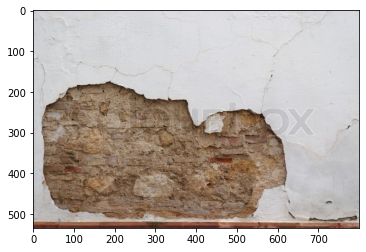

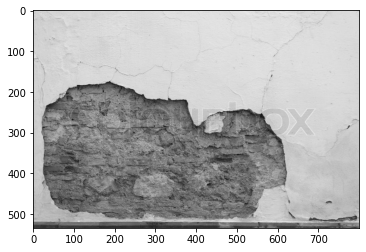

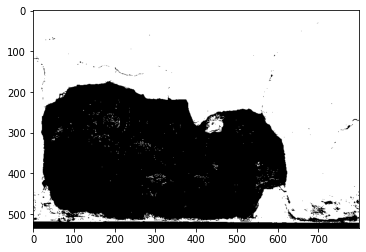

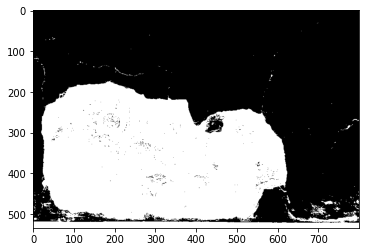

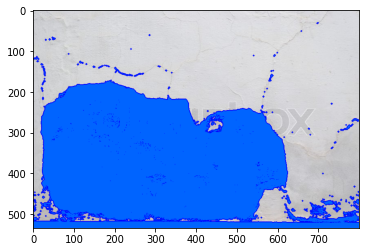

In [83]:
plotImage("ColorImage", imgColor)
plotImage("GrayImage", imgGray)
plotImage("TriBinInv", threshTriangle)
plotImage("TriBinInv", threshTriangleInv)
plotImage("TriBinInv", imgCntFill)